**Temat projektu: Analiza wpływu różnych czynników na występowanie choroby serca.**

**Cel analizy statystycznej:**
- zbadanie zależności między różnymi cechami a występowaniem choroby serca,
- zidentyfikowanie istotnych czynników ryzyka i czynników ochronnych,
- zbudowanie modelu predykcyjnego na podstawie dostępnych danych, który będzie mógł przewidywać obecność choroby serca u pacjenta na podstawie jego cech.

Zaimportowanie potrzebnych bibliotek.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Załadowanie pliku heart.csv, i zapisanie go pod zmienną "data".

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Charakterystyka poszezególnych kolumn:

**age:** wiek pacjenta (zmienna ilościowa ciągła)

**sex:** płeć pacjenta (zmienna jakościowa) - 0 to mężczyźni, a 1 to kobiety

**cp:** rodzaj bólu w klatce piersiowej (zmienna jakościowa)

**trtbps:** ciśnienie krwi w spoczynku (zmienna ilościowa ciągła)

**chol:** poziom cholesterolu we krwi (zmienna ilościowa ciągła)

**fbs:** poziom cukru we krwi na czezo > 120 mg/dl (1- prawda, 0 - fałsz) (zmienna jakościowa)

**restecg:** wynik elektrokardiografii w spoczynku (zmienna jakościowa)

**thalachh:** maksymalne osiągnięte tętno (zmienna ilościowa ciągła)

**exng:** dusznica bolesna wywołana wysiłkiem (1-tak, 0 - nie) (zmienna jakościowa)

**oldpeak:** obniżenie odeinka ST wywołane wysiłkiem względem odpoczynku (zmienna

ilościowa ciągła)

**slp:** nachylenie odcinka ST w fazie szczytowej wysiłku (zmienna jakościowa)

**caa:** liczba głównych naczyńi (0-3), zabarwionych przez fluoroskopię (zmienna jakościowa)

**thall:** wynik testu odwracalnościtalii (zmienna jakościowa)

**output:** diagnoza (0 - brak choroby, 1-obecność choroby) (zmienna jakościowa)

Wygenerowanie statystyk opisowych dla wybranych zmiennych: age (wiek), trtbps (ciśnienie krwi), chol (poziom cholesterolu):

In [ ]:
selected_columns = ['age', 'trtbps', 'chol']
statistics = data[selected_columns].describe()
print(statistics)

              age      trtbps        chol
count  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026
std      9.082101   17.538143   51.830751
min     29.000000   94.000000  126.000000
25%     47.500000  120.000000  211.000000
50%     55.000000  130.000000  240.000000
75%     61.000000  140.000000  274.500000
max     77.000000  200.000000  564.000000


**Hipoteza badawcza 1: Istnieje zależność między maksymalnym osiąganym tętnem a występowaniem choroby serca.**

Wygenerowanie dla zmienniej objaśnianej (output-diagnoza; 0-brak choroby; 1-obecność choroby) wykresu ramka-wąsy dla mediany oraz histogramu (zależne od maksymalnego osiąganego tętna):

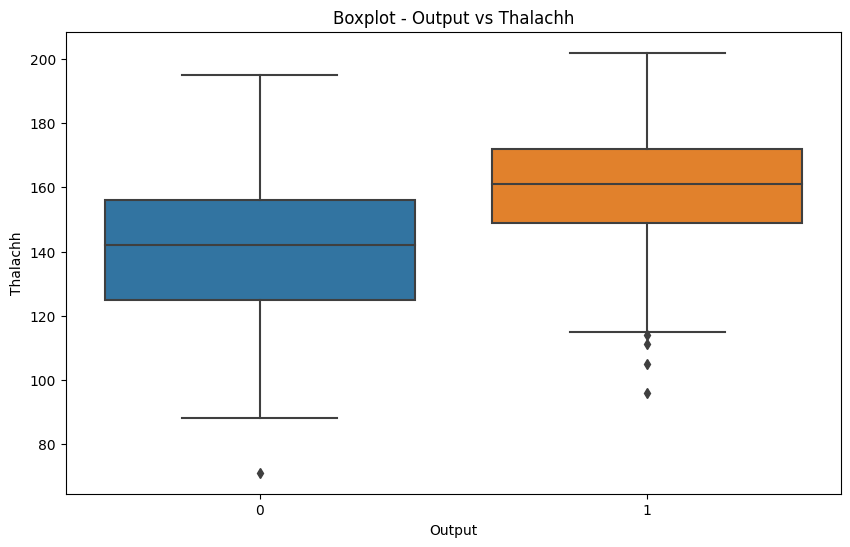

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='thalachh', data=data)
plt.xlabel('Output')
plt.ylabel('Thalachh')
plt.title('Boxplot - Output vs Thalachh')
plt.show()


Po analizie wykresu ramka - wąsy, możemy zauważyć, że osoby z chorobami serca osiągają wyższe maksymalne tętno (to jest zmienna *Thalachh*). Rozproszenie dla obu przypadków jest stosunkowo podobne.

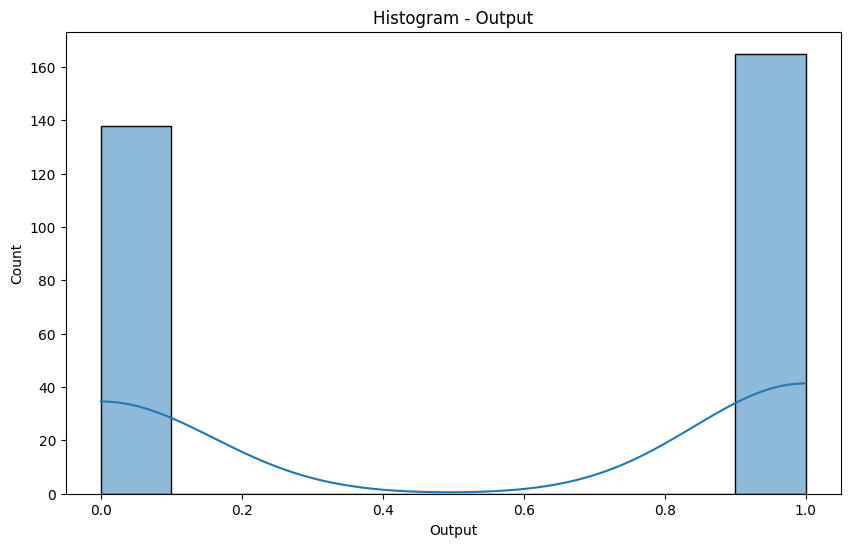

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='output', kde=True)
plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Histogram - Output')
plt.show()

Po histogramie możemy zobaczyć, że w grupie obserwowanych więcej jest osób z chorobą serca.

**Hipoteza badawcza 2: Istnieje zależność między wiekiem pacjenta a występowaniem choroby serca. Starsi pacjenci mają większe ryzyko choroby serca.**

Wygenerowanie skategoryzowanego wykresu ramka-wąsy oraz skategoryzowanego histogramu (obecność choroby uzależniona od wieku):

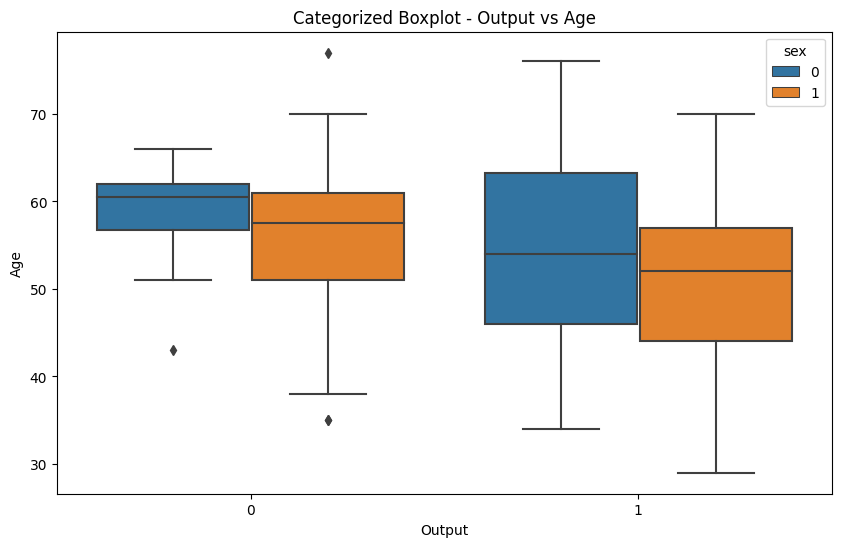

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='age', hue='sex', data=data)
plt.xlabel('Output')
plt.ylabel('Age')
plt.title('Categorized Boxplot - Output vs Age')
plt.show()


Na bazie skategoryzowanego wykresu ramka - wąsy, można zauważyć, że choroby serca zdecydowanie cześciej występują u mężczyzn i są diagnozowane w później niż u kobiet.
Z kolei dla osób nie posiadających choroby serca, można zaobserwować u mężczyzn krótsze wąsy, tzn. grupa obserwujących była w podobnym wieku, a u kobiet jest ono zdecydowanie większe - szersza grupa testowa. Dodatkowo dla kobiet w wieku poniżej 55 lat jest większe rozproszenie, względem tych starszych.

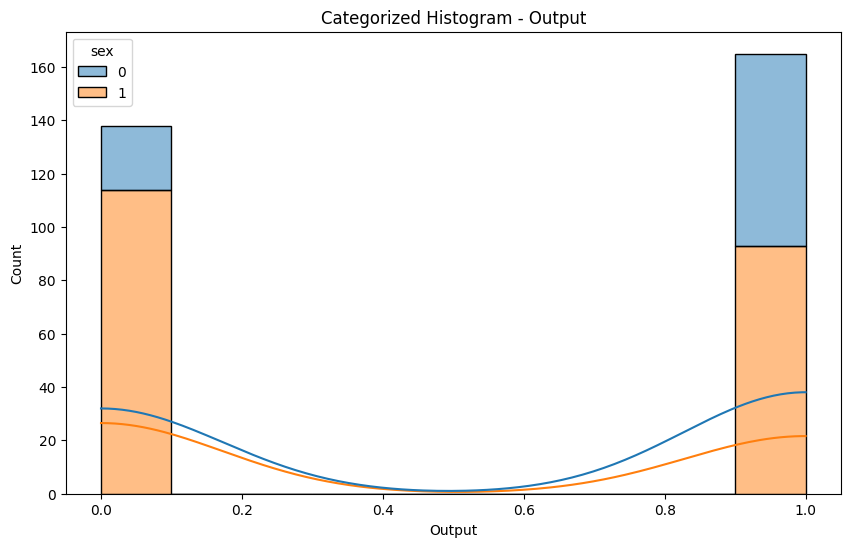

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='output', hue='sex', multiple='stack', kde=True)
plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Categorized Histogram - Output')
plt.show()

Podobnie , jak w przypadku wykresu ramka - wąsy, jesteśmy w stanie zaobserwować, że ilość mężczyzn zmagająca się z chorobą serca jest większa niż u kobiet.

Przeprowadzenie weryfikacji hipotezy o zgodności empirycznego rozkładu wybranej cechy z rozkładem normalnym.

In [ ]:
variable = 'chol'
_, p_value = stats.normaltest(data[variable])
alpha = 0.05

if p_value < alpha:
    print(f'P-value = {p_value:.4f}, odrzucamy hipotezę o zgodności rozkładu {variable} z rozkładem normalnym.')
else:
    print(f'P-value = {p_value:.4f}, nie ma podstaw do odrzucenia hipotezy o zgodności rozkładu {variable} z rozkładem normalnym.')

P-value = 0.0000, odrzucamy hipotezę o zgodności rozkładu chol z rozkładem normalnym.


Utworzenie macierzy korelacji dla naszych zmiennych.

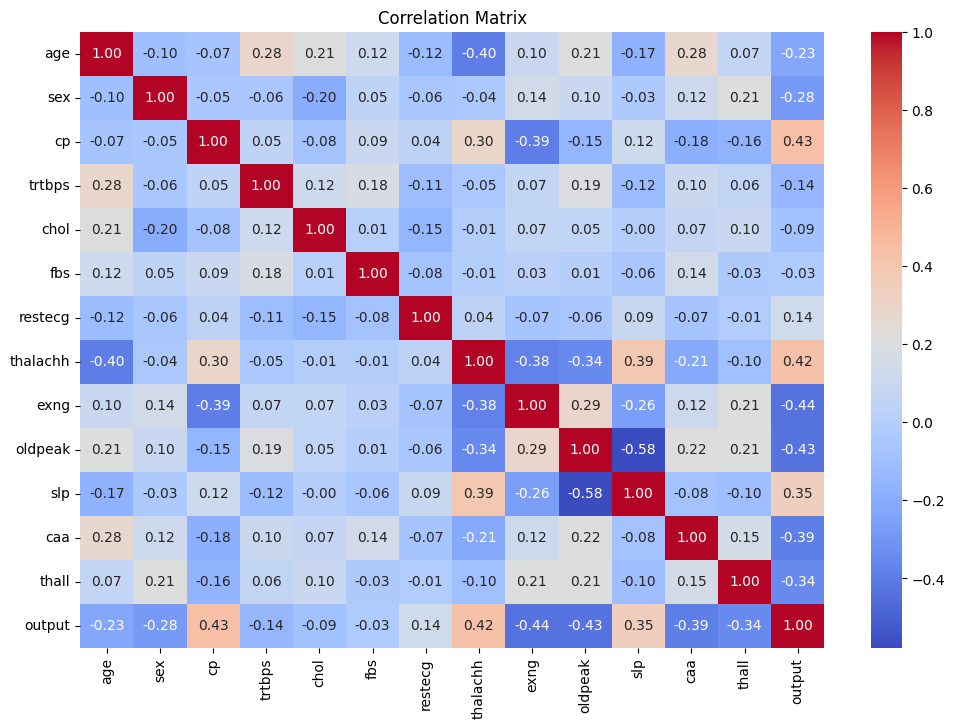

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Ze względu na to, że są wartości znajdują się pomiędzy wartościami 0.30 i 0.50 możemy stwierdzić, że korelacja jest przęcietna. Możemy zaobserwować, że jedną z najmocniejszych korelacji z output ma zmienna thalachh.

Podział zbioru danych na zbiory treningowy i testowy. Zbudowanie modelu regresji liniowej prostej na zbiorze treningowym

In [ ]:
X = data[['age', 'sex', 'cp', 'trtbps' , 'chol' , 'fbs' , 'restecg', 'exng', 'oldpeak', 'slp' , 'caa' , 'thall', 'thalachh']]
Y = data[['output']]

X.shape
Y.shape

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42) 

for subset in [X, Y, X_train, Y_train, X_test, Y_test]:
    print(subset.shape)

(303, 13)
(303, 1)
(242, 13)
(242, 1)
(61, 13)
(61, 1)


In [ ]:
61/303

0.20132013201320131

Stosunek zbioru testowego do całości - wychodzi 20% 

Tworzenie modelu

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.coef_

array([[-0.00062752, -0.1935466 ,  0.10288355, -0.00208192, -0.00024992,
         0.02845524,  0.05171915, -0.1696945 , -0.06264225,  0.1057503 ,
        -0.10996777, -0.1255391 ,  0.00230438]])

output = -0.000628 * age - 0.193547 * sex + 0.102884 * cp - 0.002082 * trtbps - 0.000250 * chol + 0.028455 * fbs + 0.051719 * restecg + 0.002304 * thalachh - 0.169694 * exng - 0.062642 * oldpeak + 0.105750 * slp - 0.109968 * caa - 0.125539 * thall

Równanie to pozwala przewidywać wartość zmiennej objaśnianej "output" na podstawie wartości zmiennych objaśniających.

In [ ]:
model.intercept_

array([0.89414512])

Predykcja

In [ ]:
Y_predict_train = model.predict(X_train)
Y_predict_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2_train = r2_score(y_true = Y_train, y_pred = Y_predict_train)
R2_test = r2_score(y_true = Y_test, y_pred = Y_predict_test)

MAE_train = mean_absolute_error(y_true = Y_train, y_pred = Y_predict_train)
MAE_test = mean_absolute_error(y_true = Y_test, y_pred = Y_predict_test)

MSE_train = mean_squared_error(y_true = Y_train, y_pred = Y_predict_train)
MSE_test = mean_squared_error(y_true = Y_test, y_pred = Y_predict_test)

RMSE_train = mean_squared_error(y_true = Y_train, y_pred = Y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = Y_test, y_pred = Y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.5077512865986449,     R2_test = 0.5337894947682487,
MAE_train = 0.28399357840776573,    MAE_test = 0.2668368016900797,
MSE_train = 0.12185181336963744,    MSE_test = 0.11627071992880011,
RMSE_train = 0.34907279093283317,    RMSE_test = 0.3409849262486542 


Patrząc na wyniki współczynnika determinacji, możemy stwierdzić, że model treningowy jest mniej douczony niż model testowy. Można zaliczyć go do korelacji wysokiej ( jest > 50 ).

Ewidentnie widać, że nasz model testowy mieści się na granicy przedziałów:
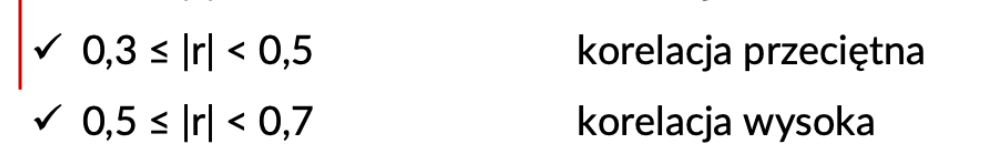

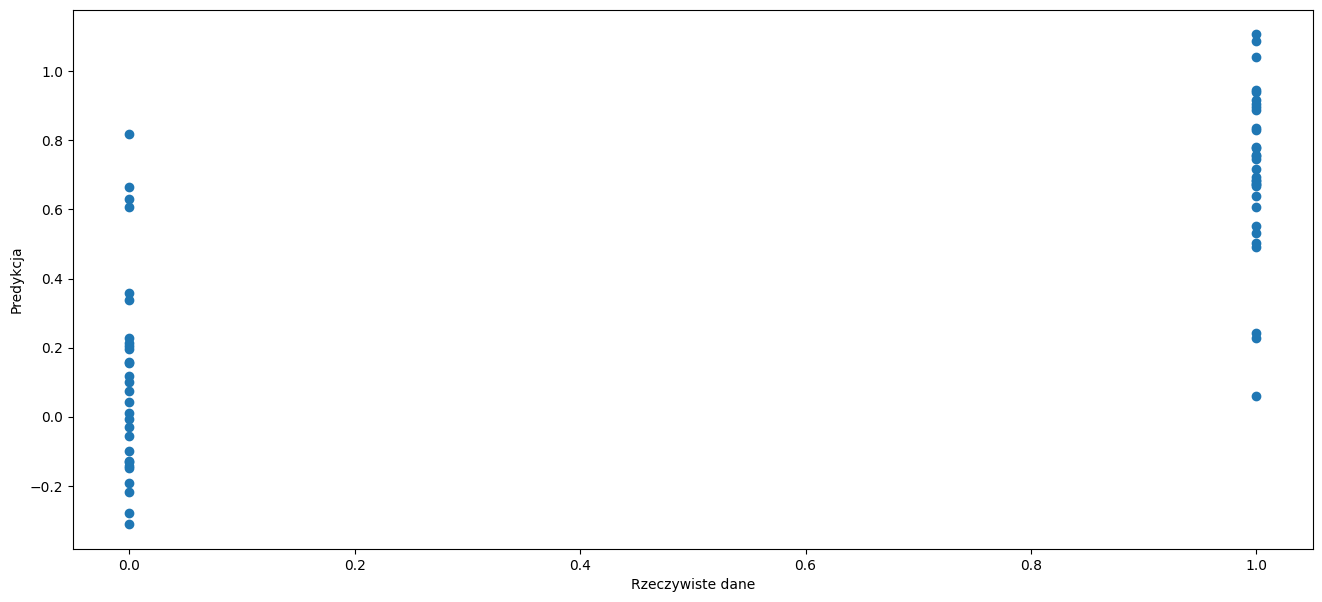

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=Y_test,
           y=Y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()